# The foam core experiment

Continuing the project to distribute WiFi temperature probes around the house.

In the [initial experiment](InitialTemperatureValues.ipynb), sensors were laid out haphazardly. For this round, I built a mounting harness so that the sensors would get more consistent airflow. I was also curious to see if putting a piece of foam core board between the SHT30 sensor board and the ESP8266 board would help isolate the sensor from heat radiated by the ESP8266. I was hoping the temperature readings would drop a few degrees, since a piece of foam core would be a cheap and easy fix.

A few minutes before 19:00, I changed the setup from

![haphazard arrangement](haphazard.jpg)

to use a harness built out of scrap foam core board.

![foamcore harness](foamcore.jpg)

The code below is explained in the [InitialTemperatureValues](InitialTemperatureValues.ipynb) notebook.

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 5)
import pandas as pd

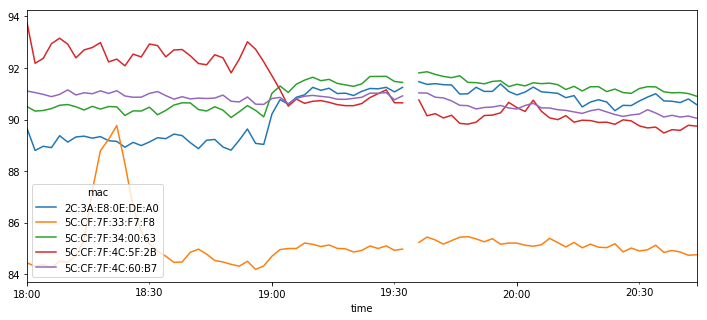

In [2]:
df = pd.read_csv('temps-foamcore.csv', header=None, names=['time', 'mac', 'f', 'h'], parse_dates=[0])
per_sensor_f = df.pivot(index='time', columns='mac', values='f')
downsampled_f = per_sensor_f.resample('2T').mean()
downsampled_f.plot();

Confirmation that the sensors are sensitive to airflow.

The outlier sensor (`:F8`) is still there. The spike at 18:20 is probably from me holding it while wondering about heat disappation. One of the WiFi drop-out issues got fixed (and another discovered).

Applying the same guestimated correction to the outlier sensor from the first experiment...

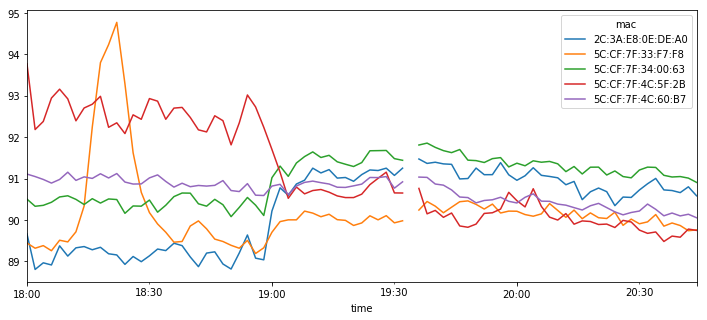

In [3]:
downsampled_f['5C:CF:7F:33:F7:F8'] += 5.0
downsampled_f.plot();

During the experiment, the room thermostat claimed 84F. It sure didn't feel like 91F. So it looks like foam core board either isn't a great insulator, or (more likely) heat from the ESP8266 is working its way through the connections to the sensor board and getting to the SHT30 chip. The foam core divider did seem warmer on the ESP8266 side, but the overall probe still felt slightly warm to the touch. A few minutes with a FLIR camera would be great, but this project doesn't justify buying one, and I don't know of one nearby to borrow.

## Next Steps

I'm puzzled about the degree to which heat from the ESP8266 is affecting the temperature sensors, so I might try moving the boards a few inches apart. That will require jumper wires, which would be a more fragile arrangement to deploy; applying a per-sensor adjustment in software would be simpler.

Whether or not that works, I'll run this for a day to gather enough data for per-sensor adjustments. The goal is to get a handle on temperature changes within the house. That doesn't require crazy high precision. It looks like this'll be Good Enough.

